Project "Python for data science"
--

### Data collection and preparation


In [1]:
# Install folium package
!pip install folium

In [4]:
# Install folium package
!pip install geopandas

In [2]:
import folium
import geopandas as gpd
from folium.plugins import HeatMap

In [4]:
import numpy as np 
import pandas as pd

In [6]:
from datetime import datetime


In [8]:
# Importer les modules nécessaires pour préparer les données
from sklearn.model_selection import train_test_split

# Importer les modules pour construire des pipelines et faire de la réduction de dimension
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Importer le module pour le modèle de régression
from sklearn.linear_model import LinearRegression

# Importer les métriques pour l'évaluation du modèle
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the gas prices file**

 **Attendu #1 et Attendu #2**

In [12]:
# Import the dataset
price_df = pd.read_csv(
    'Prix2023.csv.gz',
    sep=';',  # Specified delimiter
    header=None,  # No header in the file
    names=[
        'id_station', 'zip_code', 'pop_type', 'latitude', 'longitude',
        'date', 'id_gas', 'gas_label', 'price'
    ],  # Column names in the given order
    dtype={
        'id_station': str,
        'zip_code': str,  # Postal codes as strings
        'pop_type': str,  # Type of population (R ou A)
        'latitude': float,
        'longitude': float,
        'price': float  # Price in millieuros (float)
    },
    parse_dates=['date'] # Automatic date conversion
)

In [14]:
# Display the first few rows for verification
print(price_df.head())

  id_station zip_code pop_type   latitude  longitude                date  \
0    1000001    01000        R  4620100.0   519800.0 2023-01-02 07:53:26   
1    1000001    01000        R  4620100.0   519800.0 2023-01-05 09:33:37   
2    1000001    01000        R  4620100.0   519800.0 2023-01-09 14:51:49   
3    1000001    01000        R  4620100.0   519800.0 2023-01-11 09:23:54   
4    1000001    01000        R  4620100.0   519800.0 2023-01-13 09:07:40   

   id_gas gas_label  price  
0     1.0    Gazole  1.867  
1     1.0    Gazole  1.877  
2     1.0    Gazole  1.875  
3     1.0    Gazole  1.859  
4     1.0    Gazole  1.862  


In [16]:
price_df.shape

(4687530, 9)

In [18]:
price_df.columns

Index(['id_station', 'zip_code', 'pop_type', 'latitude', 'longitude', 'date',
       'id_gas', 'gas_label', 'price'],
      dtype='object')

In [20]:
# Check the missing values
price_df.head().isna()

,id_station,zip_code,pop_type,latitude,longitude,date,id_gas,gas_label,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [22]:
# Number of missing values by column into data frame 
price_df.isna().sum()

id_station       0
zip_code         0
pop_type         0
latitude        69
longitude       68
date          4177
id_gas        4177
gas_label     4177
price         4177
dtype: int64

In [24]:
# Number of missing values into data frame 
price_df.isna().sum().sum()

16845

### Extraction of the year, month, and week of the year from the date column

In [26]:
# Extraction of the year, month, and week of the year from the column "date"
price_df['year'] = price_df['date'].dt.year
price_df['month'] = price_df['date'].dt.month
price_df['week'] = price_df['date'].dt.isocalendar().week



In [28]:
# Displaying columns
price_df.columns

Index(['id_station', 'zip_code', 'pop_type', 'latitude', 'longitude', 'date',
       'id_gas', 'gas_label', 'price', 'year', 'month', 'week'],
      dtype='object')

In [30]:
print(price_df.head())

  id_station zip_code pop_type   latitude  longitude                date  \
0    1000001    01000        R  4620100.0   519800.0 2023-01-02 07:53:26   
1    1000001    01000        R  4620100.0   519800.0 2023-01-05 09:33:37   
2    1000001    01000        R  4620100.0   519800.0 2023-01-09 14:51:49   
3    1000001    01000        R  4620100.0   519800.0 2023-01-11 09:23:54   
4    1000001    01000        R  4620100.0   519800.0 2023-01-13 09:07:40   

   id_gas gas_label  price    year  month  week  
0     1.0    Gazole  1.867  2023.0    1.0     1  
1     1.0    Gazole  1.877  2023.0    1.0     1  
2     1.0    Gazole  1.875  2023.0    1.0     2  
3     1.0    Gazole  1.859  2023.0    1.0     2  
4     1.0    Gazole  1.862  2023.0    1.0     2  


### Latitude and longitude for mapping (divided by the appropriate power of 10)

Longitude measures the angular distance of a point relative to the reference meridian, called the Greenwich meridian, located at 0° longitude. It ranges from -180° (to the west) to 180° (to the east).

Latitude measures the angular distance of a point relative to the equator, which is the imaginary line halfway between the North and South Poles. It ranges from -90° (South Pole) to 90° (North Pole).

In [32]:
# Show the min and the max of longitude into our data set
max_longitude = price_df['longitude'].max()
min_longitude = price_df['longitude'].min()
print(max_longitude, min_longitude)

5529526.0602666 -472300.0


In [34]:
# Show the min and the max of latitude into our data set
max_latitude = price_df['latitude'].max()
min_latitude = price_df['latitude'].min()
print(max_latitude, min_latitude)

6260655.98007 -2094971.3596753


In [36]:
# Preparation of latitude and longitude for mapping
# (Division by the appropriate power of 10)
price_df['latitude'] = price_df['latitude'] / 10**5
price_df['longitude'] = price_df['longitude'] / 10**5

In [38]:
# Displaying the first few rows for verification
print(price_df.head())

  id_station zip_code pop_type  latitude  longitude                date  \
0    1000001    01000        R    46.201      5.198 2023-01-02 07:53:26   
1    1000001    01000        R    46.201      5.198 2023-01-05 09:33:37   
2    1000001    01000        R    46.201      5.198 2023-01-09 14:51:49   
3    1000001    01000        R    46.201      5.198 2023-01-11 09:23:54   
4    1000001    01000        R    46.201      5.198 2023-01-13 09:07:40   

   id_gas gas_label  price    year  month  week  
0     1.0    Gazole  1.867  2023.0    1.0     1  
1     1.0    Gazole  1.877  2023.0    1.0     1  
2     1.0    Gazole  1.875  2023.0    1.0     2  
3     1.0    Gazole  1.859  2023.0    1.0     2  
4     1.0    Gazole  1.862  2023.0    1.0     2  


### Basic statistics and the types of fuel of interest for the rest of the project

**Attendu #3**

In [40]:
# Grouping by fuel type and statistical description

gas_stats = price_df.groupby('gas_label')['price'].describe()
gas_stats

,count,mean,std,min,25%,50%,75%,max
gas_label,,,,,,,,
E10,1176889.0,1.872632,0.096234,0.040,1.809,1.868,1.929,9.949
E85,479380.0,1.078817,0.098473,0.019,0.999,1.079,1.139,9.989
GPLc,204305.0,0.996458,0.089196,0.019,0.939,0.987,1.050,2.837
Gazole,1398374.0,1.821179,0.117766,0.004,1.743,1.819,1.899,9.919
SP95,314626.0,1.886551,0.083398,0.049,1.834,1.889,1.939,9.000
SP98,1109779.0,1.953037,0.101238,0.019,1.889,1.950,1.990,9.970


In [42]:
n = len(price_df)  # number of observations

In [44]:
# Display the frequency of each gas type
frequency_percentage = (gas_stats['count']/n)*100
print("\nFrequency of gas types :")
print(frequency_percentage.sort_values(ascending=False))


Frequency of gas types :
gas_label
Gazole    29.831788
E10       25.106805
SP98      23.675134
E85       10.226708
SP95       6.711978
GPLc       4.358479
Name: count, dtype: float64


The gas types SP95 and GPLc have very low frequencies compared to the other types. Therefore, they can be filtered out for the rest of the project. 
The gas types to retain, which are of interest for the rest of the project, are Gazole, E10, SP98, and E85.

In [46]:
# Removal of the two gas types that are not relevant for the rest of the project.
price_df_filter = price_df[~price_df['gas_label'].isin(['GPLc', 'SP95'])].copy()

**Verification of the removal of observations associated with the two categories GPLc and SP95**

In [48]:
price_df_filter.shape

(4168599, 12)

In [50]:
price_df.shape

(4687530, 12)

In [52]:
price_df.shape[0] - price_df_filter.shape[0]

518931

In [54]:
price_df_filter['gas_label'].nunique()

4

In [56]:
price_df_filter['gas_label'].unique()

array(['Gazole', 'E85', 'E10', 'SP98', nan], dtype=object)

Calculation of the price index for each station per week.
--

**Attendu #4**

In [58]:
price_df_filter.columns

Index(['id_station', 'zip_code', 'pop_type', 'latitude', 'longitude', 'date',
       'id_gas', 'gas_label', 'price', 'year', 'month', 'week'],
      dtype='object')


### Calculate the average daily price in France by gas type


In [60]:
# Let's add a new column with the dates without the times
price_df_filter['date_only'] = price_df_filter['date'].dt.date

In [62]:
price_df_filter.head()

,id_station,zip_code,pop_type,latitude,longitude,date,id_gas,gas_label,price,year,month,week,date_only
0,1000001,01000,R,46.201,5.198,2023-01-02 07:53:26,1.0,Gazole,1.867,2023.0,1.0,1,2023-01-02
1,1000001,01000,R,46.201,5.198,2023-01-05 09:33:37,1.0,Gazole,1.877,2023.0,1.0,1,2023-01-05
2,1000001,01000,R,46.201,5.198,2023-01-09 14:51:49,1.0,Gazole,1.875,2023.0,1.0,2,2023-01-09
3,1000001,01000,R,46.201,5.198,2023-01-11 09:23:54,1.0,Gazole,1.859,2023.0,1.0,2,2023-01-11
4,1000001,01000,R,46.201,5.198,2023-01-13 09:07:40,1.0,Gazole,1.862,2023.0,1.0,2,2023-01-13


In [64]:
# average price per date and gas label
average_daily_price  = (price_df_filter.groupby(['gas_label', 'date_only'])['price'].mean()).reset_index()

In [66]:
average_daily_price = average_daily_price.rename(columns={'price': 'mean_price'})

In [68]:
average_daily_price[average_daily_price['gas_label'] == 'Gazole'].head()

,gas_label,date_only,mean_price
730,Gazole,2023-01-01,1.932416
731,Gazole,2023-01-02,1.895031
732,Gazole,2023-01-03,1.917166
733,Gazole,2023-01-04,1.927109
734,Gazole,2023-01-05,1.928939


In [70]:
# merge
merge_price_df_filter = price_df_filter.merge(average_daily_price,
                                              how='left', 
                                              on=['date_only', 'gas_label']  # Liste des colonnes à utiliser comme clés
                                             )

In [72]:
merge_price_df_filter.head()

,id_station,zip_code,pop_type,latitude,longitude,date,id_gas,gas_label,price,year,month,week,date_only,mean_price
0,1000001,01000,R,46.201,5.198,2023-01-02 07:53:26,1.0,Gazole,1.867,2023.0,1.0,1,2023-01-02,1.895031
1,1000001,01000,R,46.201,5.198,2023-01-05 09:33:37,1.0,Gazole,1.877,2023.0,1.0,1,2023-01-05,1.928939
2,1000001,01000,R,46.201,5.198,2023-01-09 14:51:49,1.0,Gazole,1.875,2023.0,1.0,2,2023-01-09,1.908270
3,1000001,01000,R,46.201,5.198,2023-01-11 09:23:54,1.0,Gazole,1.859,2023.0,1.0,2,2023-01-11,1.898416
4,1000001,01000,R,46.201,5.198,2023-01-13 09:07:40,1.0,Gazole,1.862,2023.0,1.0,2,2023-01-13,1.913978


In [74]:
price_df_filter.shape

(4168599, 13)

In [76]:
merge_price_df_filter.shape

(4168599, 14)

### Calculate the price index

In [78]:
# Add a column for the price index
merge_price_df_filter['price_index'] = 100*((merge_price_df_filter['price'] - merge_price_df_filter['mean_price'])/merge_price_df_filter['mean_price'] + 1)

In [80]:
merge_price_df_filter.head()

,id_station,zip_code,pop_type,latitude,longitude,date,id_gas,gas_label,price,year,month,week,date_only,mean_price,price_index
0,1000001,01000,R,46.201,5.198,2023-01-02 07:53:26,1.0,Gazole,1.867,2023.0,1.0,1,2023-01-02,1.895031,98.520825
1,1000001,01000,R,46.201,5.198,2023-01-05 09:33:37,1.0,Gazole,1.877,2023.0,1.0,1,2023-01-05,1.928939,97.307368
2,1000001,01000,R,46.201,5.198,2023-01-09 14:51:49,1.0,Gazole,1.875,2023.0,1.0,2,2023-01-09,1.908270,98.256561
3,1000001,01000,R,46.201,5.198,2023-01-11 09:23:54,1.0,Gazole,1.859,2023.0,1.0,2,2023-01-11,1.898416,97.923743
4,1000001,01000,R,46.201,5.198,2023-01-13 09:07:40,1.0,Gazole,1.862,2023.0,1.0,2,2023-01-13,1.913978,97.284302


***Index of the Week***

**Attendu #5**

In [82]:
# The week index is the same as the week. Thus we are going to rename the week column
merge_price_df_filter =  merge_price_df_filter.rename(columns = {'week' : 'week_index'})

In [84]:
merge_price_df_filter.head()

,id_station,zip_code,pop_type,latitude,longitude,date,id_gas,gas_label,price,year,month,week_index,date_only,mean_price,price_index
0,1000001,01000,R,46.201,5.198,2023-01-02 07:53:26,1.0,Gazole,1.867,2023.0,1.0,1,2023-01-02,1.895031,98.520825
1,1000001,01000,R,46.201,5.198,2023-01-05 09:33:37,1.0,Gazole,1.877,2023.0,1.0,1,2023-01-05,1.928939,97.307368
2,1000001,01000,R,46.201,5.198,2023-01-09 14:51:49,1.0,Gazole,1.875,2023.0,1.0,2,2023-01-09,1.908270,98.256561
3,1000001,01000,R,46.201,5.198,2023-01-11 09:23:54,1.0,Gazole,1.859,2023.0,1.0,2,2023-01-11,1.898416,97.923743
4,1000001,01000,R,46.201,5.198,2023-01-13 09:07:40,1.0,Gazole,1.862,2023.0,1.0,2,2023-01-13,1.913978,97.284302


In [86]:
# Agréger par station et par semaine
indice_station_week = (
    merge_price_df_filter.groupby(['id_station', 'week_index', 'gas_label'])['price_index']
    .mean()
    .reset_index()
    .rename(columns={'price_index': 'avg_price_index_weekly'})
)

In [88]:
indice_station_week.head()

,id_station,week_index,gas_label,avg_price_index_weekly
0,10000005,1,E10,100.087562
1,10000005,1,Gazole,99.005231
2,10000005,1,SP98,99.803929
3,10000005,2,E10,100.825122
4,10000005,2,Gazole,99.342087


### Data visualization


**Attendu #6**

In [90]:
# Calculation of the weekly average index for each type of gas
weekly_prices = (merge_price_df_filter
                 .dropna(subset=['week_index'])
                 .groupby(['gas_label', 'week_index'])['price_index']
                 .mean())

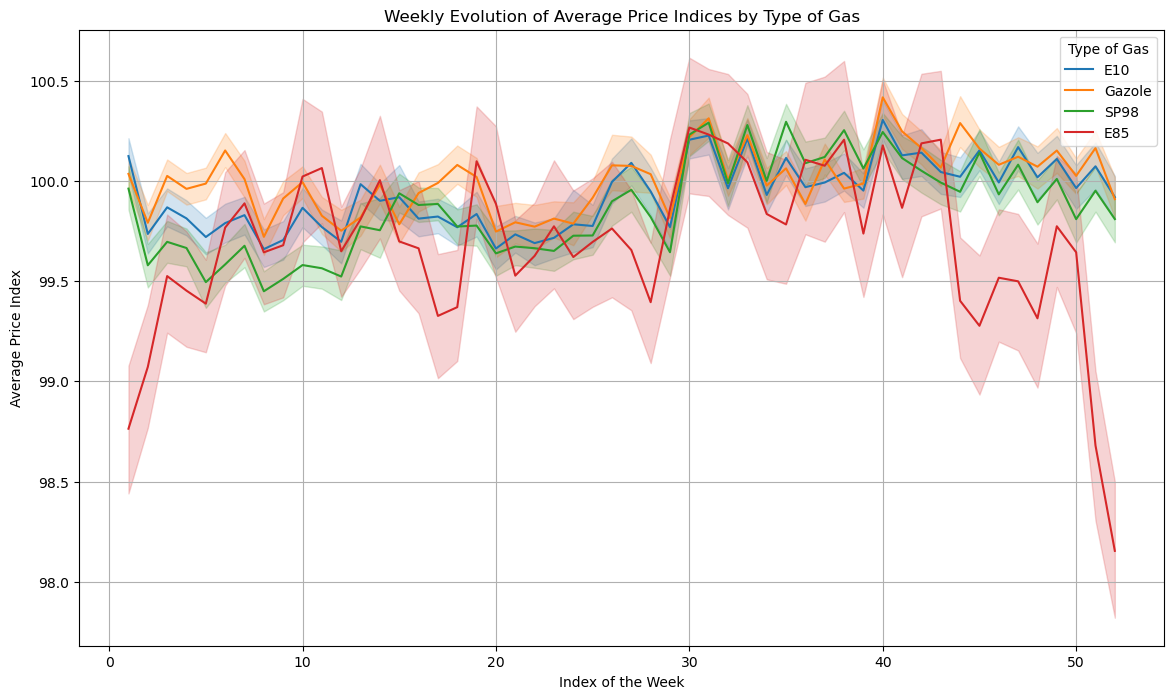

In [92]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=indice_station_week, x='week_index', y='avg_price_index_weekly', hue='gas_label')
plt.title("Weekly Evolution of Average Price Indices by Type of Gas")
plt.xlabel("Index of the Week")
plt.ylabel("Average Price Index")
plt.legend(title="Type of Gas")
plt.grid(True)
plt.show()

### Data Visualization – Bonus Question

 **Option #1**

In [94]:
# Extract the department from zip_code (taking the first 2 digits)
merge_price_df_filter['code'] = merge_price_df_filter['zip_code'].astype(str).str[:2]

In [96]:
# Calculate the average price index by department and type of carbura
mean_price_dep = (
    merge_price_df_filter.groupby(['code', 'gas_label'])
    ['price_index'].mean().reset_index()
)

In [98]:
mean_price_dep.head()  # Displaying results

,code,gas_label,price_index
0,01,E10,100.773779
1,01,E85,102.326514
2,01,Gazole,100.284983
3,01,SP98,100.934734
4,02,E10,99.488623


In [100]:
mean_price_dep.isna().sum()

code           0
gas_label      0
price_index    0
dtype: int64

In [102]:
# Load geographic data
# Upload the GeoJSON directly from GitHub
url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements.geojson"
france_departments = gpd.read_file(url)


In [104]:
# Verify the data
print(france_departments.head())

  code                      nom  \
0   01                      Ain   
1   02                    Aisne   
2   03                   Allier   
3   04  Alpes-de-Haute-Provence   
4   05             Hautes-Alpes   

                                            geometry  
0  POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...  
1  POLYGON ((3.17296 50.01131, 3.17382 50.01186, ...  
2  POLYGON ((3.03207 46.79491, 3.03424 46.7908, 3...  
3  POLYGON ((5.67604 44.19143, 5.67817 44.19051, ...  
4  POLYGON ((6.26057 45.12685, 6.26417 45.12641, ...  


In [106]:
gas_types = mean_price_dep['gas_label'].unique()
#gas_types

In [108]:
print(f"\n The types of gas are: {gas_types}")
print("Please choose the type of gas you would like to see the map of")
gas = input()


 The types of gas are: ['E10' 'E85' 'Gazole' 'SP98']
Please choose the type of gas you would like to see the map of


 E10


In [110]:
# Create a map by gas type
# Filter the data for the current gas type
gas_data = mean_price_dep[mean_price_dep['gas_label'] == gas] # Create the map
m =l= folium.Map(
    location=[46.5, 2.3],  # Central coordinates of France
    zoom_start=6,
    tiles="CartoDB positron", # map color
)   
    

In [112]:
#  Add a choropleth layer
folium.Choropleth(
        geo_data=france_departments,
        data=gas_data,
        columns=['code', 'price_index'],  # 'code'  matching to 'key_on'
        key_on='feature.properties.code',  
        fill_color='YlOrRd',  #  Color Palette
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f"Indice de prix pour {gas}",
    ).add_to(m)
    

In [114]:
#  Add tooltips 
folium.LayerControl().add_to(m)  

In [8]:
print(f" Map created for gas : {gas}")  
#m

NameError: name 'gas' is not defined

### Modeling – Next Day Price Prediction

***Attendu # 7***

In [118]:
#  Aggregation of average price per gas by day of the year
# This aggregation is the same as that performed in  "attendu #4" using 'day_only'. The difference is that the following formula allows you to keep the datetime type of the date.
price_day_label_mean = price_df_filter.groupby(['gas_label', pd.Grouper(key='date', freq='1d')])['price'].mean().reset_index() 
price_day_label_mean.head()

,gas_label,date,price
0,E10,2023-01-01,1.825184
1,E10,2023-01-02,1.790054
2,E10,2023-01-03,1.830154
3,E10,2023-01-04,1.843688
4,E10,2023-01-05,1.850857


**Train a next-day price prediction model for each gas the next day**

**Let's build a model**

In [120]:
#  Add columns for the delayed price
price_day_label_mean['price_lag1'] = price_day_label_mean.groupby('gas_label')['price'].shift(1) #   Prices of the previous day
price_day_label_mean['price_lag2'] = price_day_label_mean.groupby('gas_label')['price'].shift(2) #  Price from 2 days ago

In [122]:
price_day_label_mean.head()

,gas_label,date,price,price_lag1,price_lag2
0,E10,2023-01-01,1.825184,NaN,NaN
1,E10,2023-01-02,1.790054,1.825184,NaN
2,E10,2023-01-03,1.830154,1.790054,1.825184
3,E10,2023-01-04,1.843688,1.830154,1.790054
4,E10,2023-01-05,1.850857,1.843688,1.830154


In [124]:
#  Delete rows with missing values
price_day_label_mean = price_day_label_mean.dropna()

In [126]:
price_day_label_mean.head()

,gas_label,date,price,price_lag1,price_lag2
2,E10,2023-01-03,1.830154,1.790054,1.825184
3,E10,2023-01-04,1.843688,1.830154,1.790054
4,E10,2023-01-05,1.850857,1.843688,1.830154
5,E10,2023-01-06,1.846891,1.850857,1.843688
6,E10,2023-01-07,1.851375,1.846891,1.850857


In [128]:
#  Filter for a gas type (example: "Gazole")
type_gas = price_day_label_mean['gas_label'].unique()
print (f' Please enter the gas type: {type_gas}')
gas = input ()
key_data = price_day_label_mean[price_day_label_mean['gas_label'] == gas] #  Extract data for the type of gas concerned

 Please enter the gas type: ['E10' 'E85' 'Gazole' 'SP98']


 E10


In [130]:
key_data.head()

,gas_label,date,price,price_lag1,price_lag2
2,E10,2023-01-03,1.830154,1.790054,1.825184
3,E10,2023-01-04,1.843688,1.830154,1.790054
4,E10,2023-01-05,1.850857,1.843688,1.830154
5,E10,2023-01-06,1.846891,1.850857,1.843688
6,E10,2023-01-07,1.851375,1.846891,1.850857


In [132]:
#  Independent (X) and target (y) variables
features = ['price_lag1', 'price_lag2']
target = 'price'
X = key_data[features]
y = key_data[target]

In [134]:
# Divide data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
X_train.head()

,price_lag1,price_lag2
211,1.902841,1.881894
340,1.806530,1.810536
359,1.806776,1.792932
77,1.900211,1.892714
86,1.906942,1.919708


In [138]:
#  Define pipeline stages
estimators = [
    ('reduce_dim', PCA()),  # reduction of  dimension 
    ('regressor', LinearRegression())    #  Linear Regression Model
]

#  Creating the pipeline
pipe = Pipeline(estimators)

#  Adjusting the pipeline on training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('reduce_dim', PCA()), ('regressor', LinearRegression())])

In [140]:
#  Test Set Predictions
y_predt = pipe.predict(X_test)

**Provide precision measurements and a scatter plot**

In [142]:
#  Calculate performance metrics on the test set
test_mae = mean_absolute_error(y_test, y_predt)
test_mse = mean_squared_error(y_test, y_predt)
test_rmse = root_mean_squared_error(y_test, y_predt)
test_r2 = r2_score(y_test, y_predt)


#  Create a DataFrame to Display Performance Metrics
performance_df = pd.DataFrame({
    'metric': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Test set': [test_mae, test_mse, test_rmse, test_r2]
})

print(performance_df)

print("\n MAE: Mean Absolute Error")
print("MSE: Mean Squared Error")
print("RMSE: Root Mean Squared Error")
print("R²: Mean Absolute Error")

  metric  Test set
0    MAE  0.011352
1    MSE  0.000213
2   RMSE  0.014584
3     R²  0.910946

 MAE: Mean Absolute Error
MSE: Mean Squared Error
RMSE: Root Mean Squared Error
R²: Mean Absolute Error


**Plot a scatter plot of real vs. predicted values:**

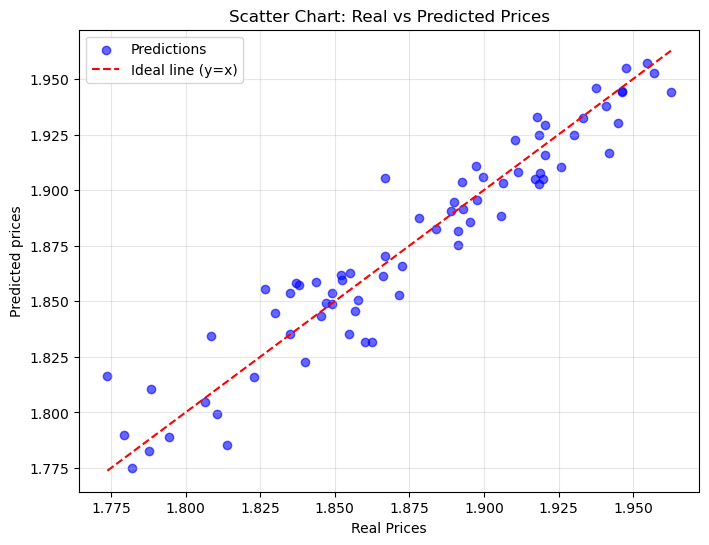

In [144]:
# Scatter Chart
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predt, color='blue', alpha=0.6, label='Predictions')  # Dispersion Points
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal line (y=x)')  # Line y=x
plt.title('Scatter Chart: Real vs Predicted Prices')
plt.xlabel('Real Prices')
plt.ylabel('Predicted prices')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [146]:
# information sesion 
import sys
sys.version

'3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]'